In [1]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

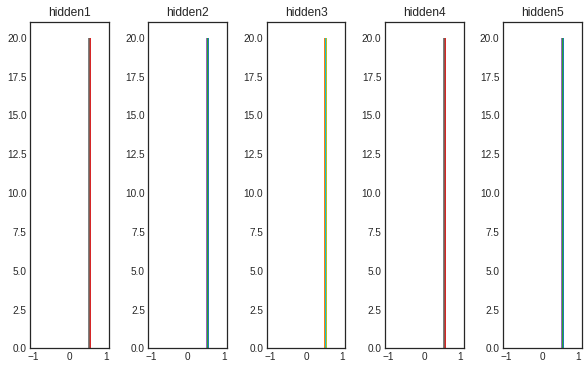

In [4]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

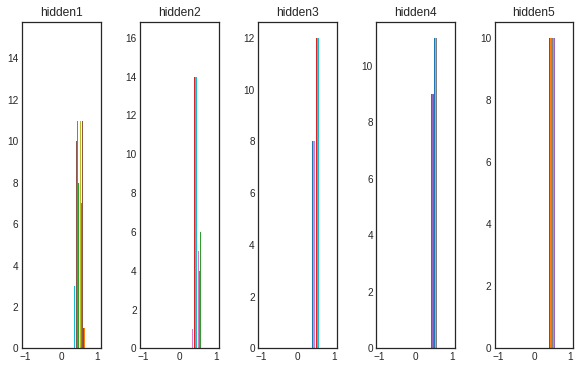

In [5]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

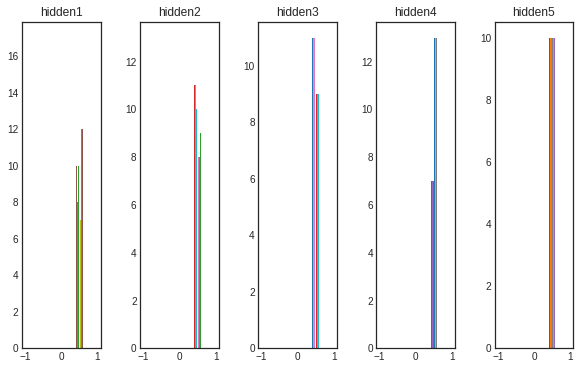

In [6]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

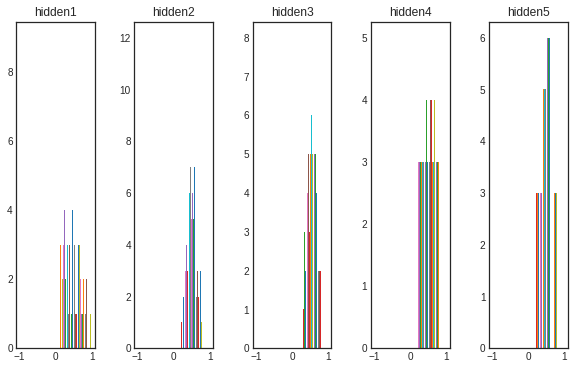

In [7]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

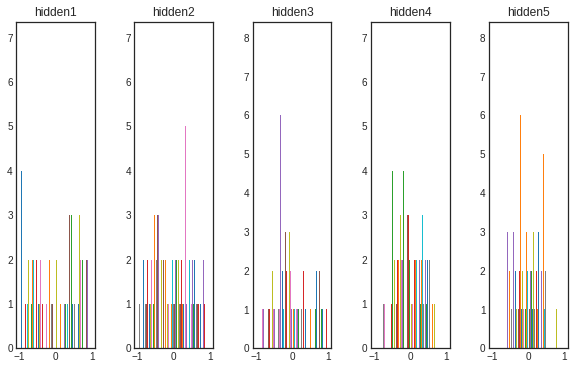

In [8]:
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

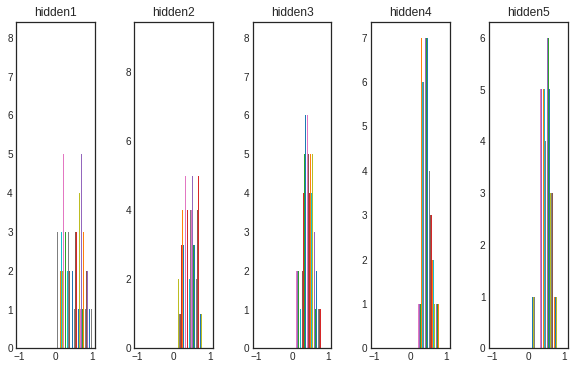

In [10]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

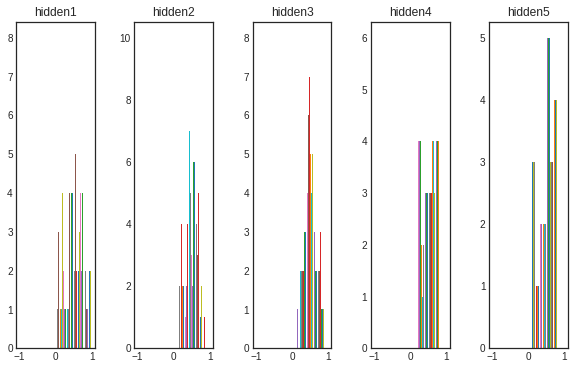

In [11]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

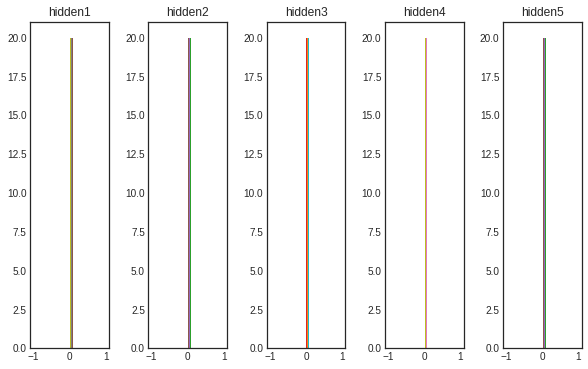

In [12]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

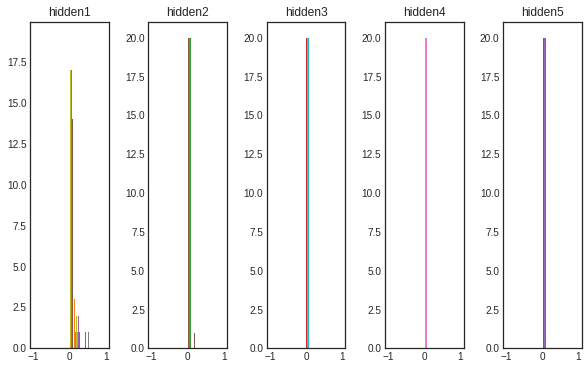

In [13]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

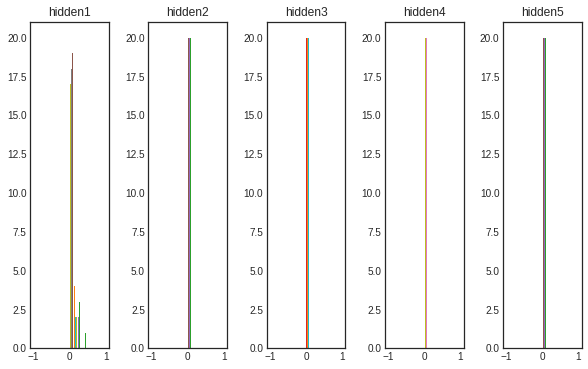

In [14]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

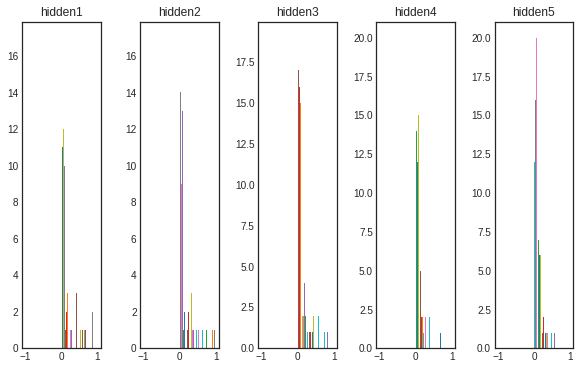

In [15]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

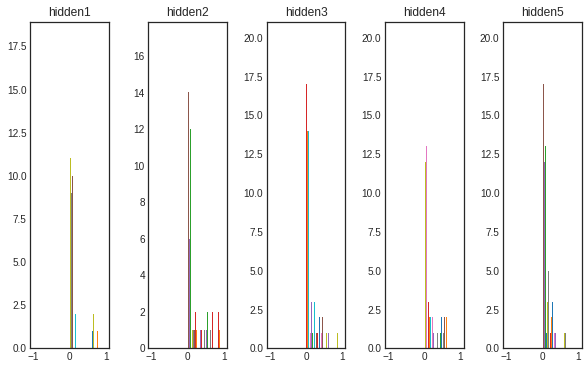

In [16]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

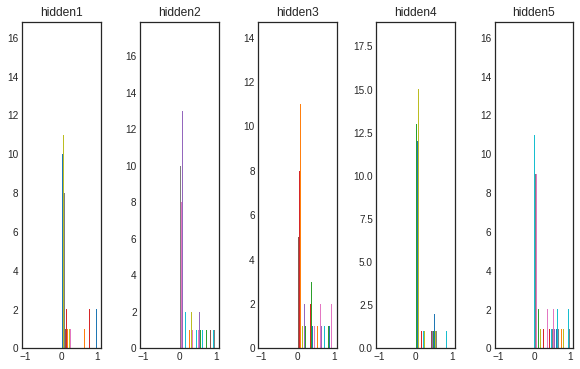

In [17]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

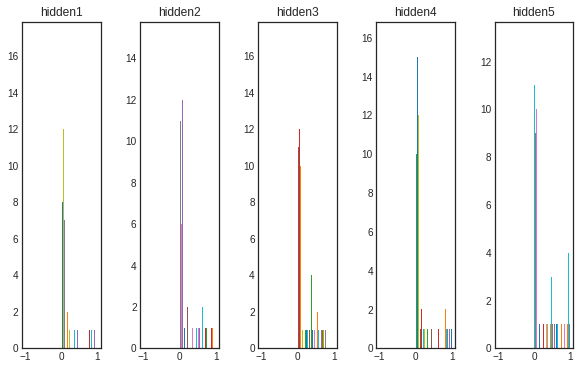

In [18]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

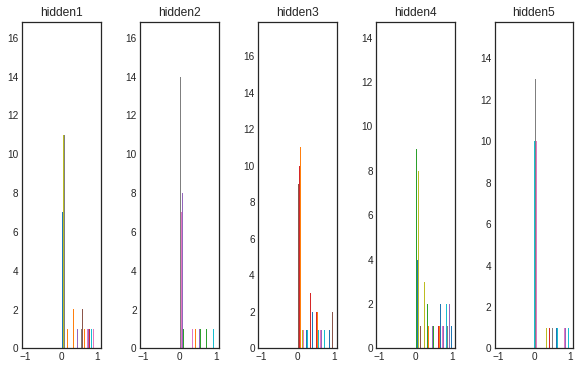

In [19]:
# [play ground]
# 사용해보고 싶은 활성화함수, 초기화 방법을 각각 activation, initializer에 입력해주세요.

model = build_model(activation = 'relu', initializer = 'HeUniform')
show_layer(model)

In [20]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [21]:
word_index = reuters.get_word_index()
word_index

565248/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [22]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
index_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [23]:
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [24]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [25]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [26]:
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [27]:
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [28]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,302,574
Trainable params: 1,302,574
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 2s 53ms/step - loss: 2.0997 - accuracy: 0.5740 - val_loss: 1.3883 - val_accuracy: 0.6910
Epoch 2/40
18/18 [==============================] - 0s 20ms/step - loss: 1.0651 - accuracy: 0.7737 - val_loss: 1.1183 - val_accuracy: 0.7587
Epoch 3/40
18/18 [==============================] - 0s 18ms/step - loss: 0.7449 - accuracy: 0.8397 - val_loss: 1.0067 - val_accuracy: 0.7845
Epoch 4/40
18/18 [==============================] - 0s 15ms/step - loss: 0.5362 - accuracy: 0.8883 - val_loss: 0.9943 - val_accuracy: 0.7760
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3865 - accuracy: 0.9171 - val_loss: 0.9145 - val_accuracy: 0.8019
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3043 - accuracy: 0.9335 - val_loss: 0.9319 - val_accuracy: 0.7952
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2444 - accuracy: 0.9424 - val_loss: 0.9177 - val_accuracy: 0.8037
Epoch 8/40
18

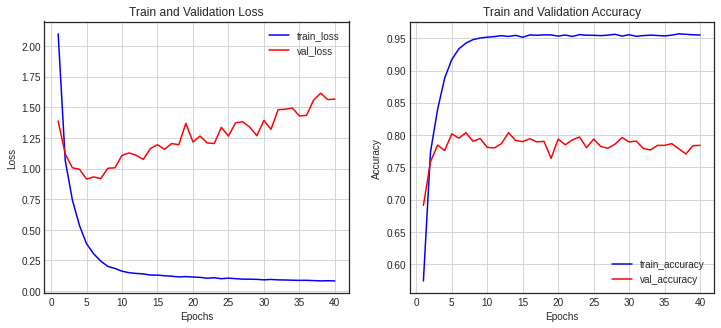

In [31]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [32]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu', 
                         kernel_initializer=initializer,
                         input_shape=(10000, ), 
                         name='input'))
  model.add(layers.Dense(128, 
                         activation='relu', 
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46, 
                         activation='softmax', 
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [33]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

In [34]:
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 [==============================] - 1s 44ms/step - loss: 3.8105 - accuracy: 0.0571 - val_loss: 3.7958 - val_accuracy: 0.0592
Epoch 2/40
18/18 [==============================] - 0s 18ms/step - loss: 3.7844 - accuracy: 0.0611 - val_loss: 3.7728 - val_accuracy: 0.0592
Epoch 3/40
18/18 [==============================] - 0s 17ms/step - loss: 3.7616 - accuracy: 0.0611 - val_loss: 3.7508 - val_accuracy: 0.0592
Epoch 4/40
18/18 [==============================] - 0s 18ms/step - loss: 3.7393 - accuracy: 0.1868 - val_loss: 3.7288 - val_accuracy: 0.3620
Epoch 5/40
18/18 [==============================] - 0s 17ms/step - loss: 3.7172 - accuracy: 0.3517 - val_loss: 3.7072 - val_accuracy: 0.3620
Epoch 6/40
18/18 [==============================] - 0s 18ms/step - loss: 3.6953 - accuracy: 0.3517 - val_loss: 3.6858 - val_accuracy: 0.3620
Epoch 7/40
18/18 [==============================] - 0s 19ms/step - loss: 3.6736 - accuracy: 0.3517 - val_loss: 3.6646 - val_accuracy: 0.3620
Epoch 8/40
18

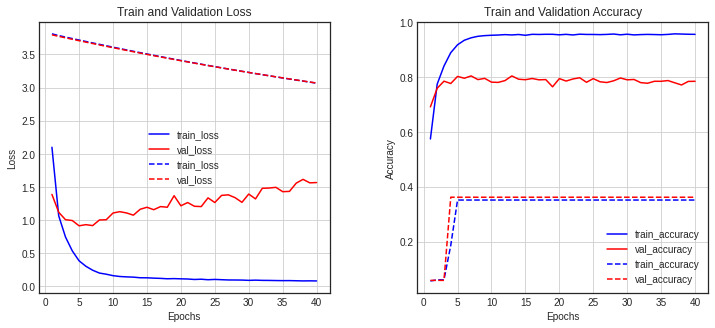

In [35]:
diff_history(history, zero_history)

In [36]:
normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 [==============================] - 1s 32ms/step - loss: 2.2470 - accuracy: 0.5249 - val_loss: 1.5966 - val_accuracy: 0.6149
Epoch 2/40
18/18 [==============================] - 0s 12ms/step - loss: 1.2770 - accuracy: 0.7111 - val_loss: 1.3003 - val_accuracy: 0.7044
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.9552 - accuracy: 0.7902 - val_loss: 1.1484 - val_accuracy: 0.7413
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.7330 - accuracy: 0.8382 - val_loss: 1.0567 - val_accuracy: 0.7627
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.5608 - accuracy: 0.8783 - val_loss: 1.0098 - val_accuracy: 0.7685
Epoch 6/40
18/18 [==============================] - 0s 12ms/step - loss: 0.4309 - accuracy: 0.9060 - val_loss: 0.9866 - val_accuracy: 0.7778
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3422 - accuracy: 0.9251 - val_loss: 1.1038 - val_accuracy: 0.7498
Epoch 8/40
18

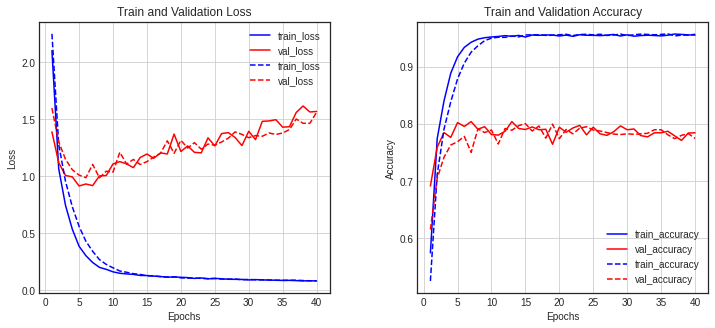

In [37]:
diff_history(history, normal_history)

In [38]:
glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 [==============================] - 1s 46ms/step - loss: 2.0731 - accuracy: 0.5842 - val_loss: 1.4031 - val_accuracy: 0.6901
Epoch 2/40
18/18 [==============================] - 0s 18ms/step - loss: 1.0633 - accuracy: 0.7708 - val_loss: 1.1333 - val_accuracy: 0.7516
Epoch 3/40
18/18 [==============================] - 0s 17ms/step - loss: 0.7478 - accuracy: 0.8403 - val_loss: 0.9994 - val_accuracy: 0.7725
Epoch 4/40
18/18 [==============================] - 0s 21ms/step - loss: 0.5350 - accuracy: 0.8860 - val_loss: 0.9901 - val_accuracy: 0.7747
Epoch 5/40
18/18 [==============================] - 0s 17ms/step - loss: 0.3985 - accuracy: 0.9144 - val_loss: 0.9424 - val_accuracy: 0.7898
Epoch 6/40
18/18 [==============================] - 0s 18ms/step - loss: 0.3048 - accuracy: 0.9324 - val_loss: 0.9515 - val_accuracy: 0.7881
Epoch 7/40
18/18 [==============================] - 0s 18ms/step - loss: 0.2458 - accuracy: 0.9443 - val_loss: 0.9656 - val_accuracy: 0.7988
Epoch 8/40
18

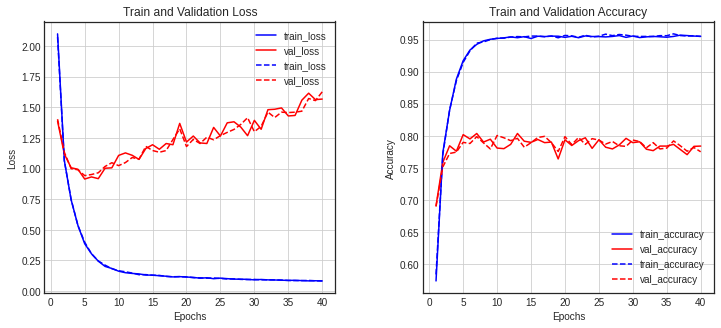

In [39]:
diff_history(history, glorot_history)

In [40]:
he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 [==============================] - 1s 46ms/step - loss: 2.0553 - accuracy: 0.5991 - val_loss: 1.3236 - val_accuracy: 0.6999
Epoch 2/40
18/18 [==============================] - 0s 17ms/step - loss: 0.9752 - accuracy: 0.7900 - val_loss: 1.0595 - val_accuracy: 0.7743
Epoch 3/40
18/18 [==============================] - 0s 17ms/step - loss: 0.6402 - accuracy: 0.8711 - val_loss: 0.9898 - val_accuracy: 0.7752
Epoch 4/40
18/18 [==============================] - 0s 17ms/step - loss: 0.4536 - accuracy: 0.9037 - val_loss: 0.9207 - val_accuracy: 0.7983
Epoch 5/40
18/18 [==============================] - 0s 16ms/step - loss: 0.3327 - accuracy: 0.9297 - val_loss: 0.8815 - val_accuracy: 0.8099
Epoch 6/40
18/18 [==============================] - 0s 16ms/step - loss: 0.2515 - accuracy: 0.9407 - val_loss: 0.9750 - val_accuracy: 0.7921
Epoch 7/40
18/18 [==============================] - 0s 18ms/step - loss: 0.2103 - accuracy: 0.9486 - val_loss: 0.9533 - val_accuracy: 0.8050
Epoch 8/40
18

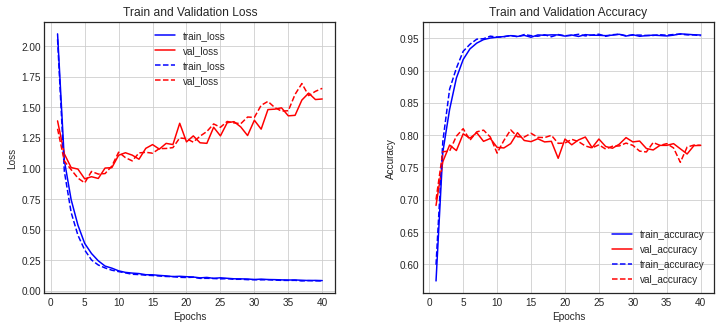

In [41]:
diff_history(history, he_history)

Epoch 1/40
18/18 [==============================] - 1s 26ms/step - loss: 2.0246 - accuracy: 0.6018 - val_loss: 1.3532 - val_accuracy: 0.6972
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 0.9537 - accuracy: 0.7975 - val_loss: 1.1305 - val_accuracy: 0.7484
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.6498 - accuracy: 0.8629 - val_loss: 0.9512 - val_accuracy: 0.7827
Epoch 4/40
18/18 [==============================] - 0s 12ms/step - loss: 0.4458 - accuracy: 0.9081 - val_loss: 0.9395 - val_accuracy: 0.7872
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3260 - accuracy: 0.9291 - val_loss: 0.9166 - val_accuracy: 0.7943
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2580 - accuracy: 0.9408 - val_loss: 0.9335 - val_accuracy: 0.8050
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2062 - accuracy: 0.9490 - val_loss: 0.9424 - val_accuracy: 0.7992
Epoch 8/40
18

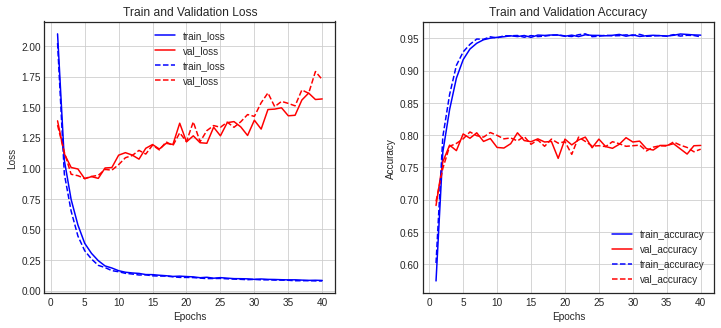

In [43]:
# [play ground]
# 이번 build_model() 함수의 인자는 각각 가중치 초기화 방법 하나입니다.

your_history = build_model(initializer = 'HeUniform')
diff_history(history, your_history)

In [44]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 46)              

In [45]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 36ms/step - loss: 1.7795 - accuracy: 0.6509 - val_loss: 3.3249 - val_accuracy: 0.7507
Epoch 2/40
18/18 [==============================] - 0s 15ms/step - loss: 0.6435 - accuracy: 0.8764 - val_loss: 3.1289 - val_accuracy: 0.7587
Epoch 3/40
18/18 [==============================] - 0s 14ms/step - loss: 0.3511 - accuracy: 0.9344 - val_loss: 2.8422 - val_accuracy: 0.7311
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2311 - accuracy: 0.9471 - val_loss: 2.5036 - val_accuracy: 0.7115
Epoch 5/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1793 - accuracy: 0.9517 - val_loss: 2.1427 - val_accuracy: 0.7035
Epoch 6/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1529 - accuracy: 0.9512 - val_loss: 1.8512 - val_accuracy: 0.7333
Epoch 7/40
18/18 [==============================] - 0s 14ms/step - loss: 0.1339 - accuracy: 0.9535 - val_loss: 1.6077 - val_accuracy: 0.7186
Epoch 8/40
18

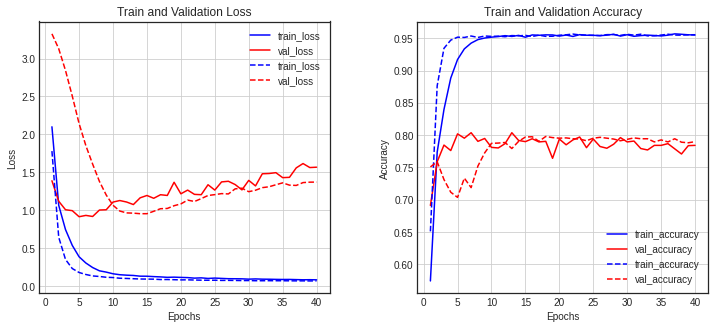

In [46]:
diff_history(history, batch_norm_history)

In [49]:
# [play ground]

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))

# 활성화 함수를 Dense 레이어와 같이 선언할 수도 있지만 단순히 위 코드에서 순서를 바꾸어도 동일하게 동작합니다.
model.add(layers.BatchNormalization())

model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
_________________________________________________________________
output (Dense)               (None, 46)                5934      
Total params: 1,286,574
Trainable params: 1,286,318
Non-trainable params: 256
_________________________________________________________________


In [50]:
orderd_bn_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 [==============================] - 1s 31ms/step - loss: 1.5210 - accuracy: 0.7140 - val_loss: 3.0081 - val_accuracy: 0.7760
Epoch 2/40
18/18 [==============================] - 0s 13ms/step - loss: 0.4838 - accuracy: 0.9189 - val_loss: 2.8238 - val_accuracy: 0.7930
Epoch 3/40
18/18 [==============================] - 0s 13ms/step - loss: 0.3499 - accuracy: 0.9399 - val_loss: 2.4765 - val_accuracy: 0.8059
Epoch 4/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2819 - accuracy: 0.9479 - val_loss: 2.2320 - val_accuracy: 0.7970
Epoch 5/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2589 - accuracy: 0.9513 - val_loss: 2.0427 - val_accuracy: 0.8014
Epoch 6/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2312 - accuracy: 0.9518 - val_loss: 1.8108 - val_accuracy: 0.8010
Epoch 7/40
18/18 [==============================] - 0s 13ms/step - loss: 0.2090 - accuracy: 0.9519 - val_loss: 1.5690 - val_accuracy: 0.7965
Epoch 8/40
18